In [1]:
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

In [2]:
@torch.enable_grad()
def grad(f, x, create_graph=True, do_sum=False):

    x.requires_grad_(True)
    
    return torch.autograd.grad(
        f(x).sum() if do_sum else f(x), 
        x, 
        create_graph=create_graph
    )[0]


In [3]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        
        i, h, o = 1, 16, 1
        self.mlp = nn.Sequential(
            nn.Linear(i, h), 
            nn.LayerNorm(h), 
            nn.ReLU(), 
            nn.Linear(h, h), 
            nn.LayerNorm(h), 
            nn.ReLU(), 
            nn.Linear(h, o)
        )

    def forward(self, x):
        return self.mlp(x)

# Raw Model

In [4]:
f = MLP()

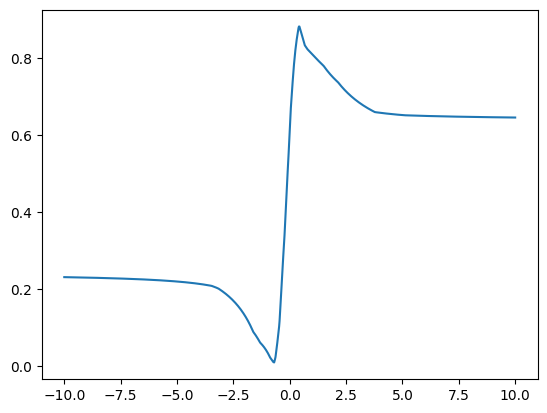

In [5]:
x = torch.linspace(-10, 10, 1000).unsqueeze(1)
plt.plot(x, f(x).detach())

# Objective

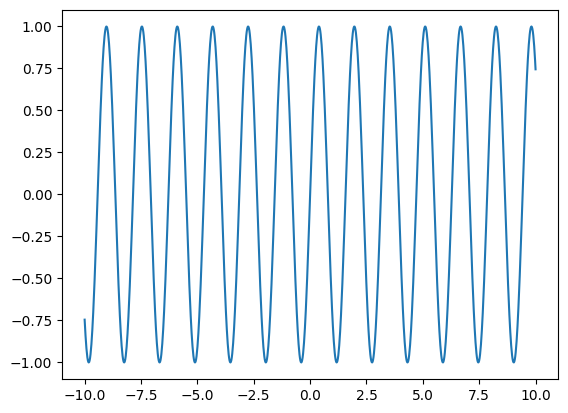

In [6]:
g = lambda x : torch.sin(4 * x)
plt.plot(x, g(x).detach())

# Train

In [7]:
optimizer = torch.optim.Adam(f.parameters())

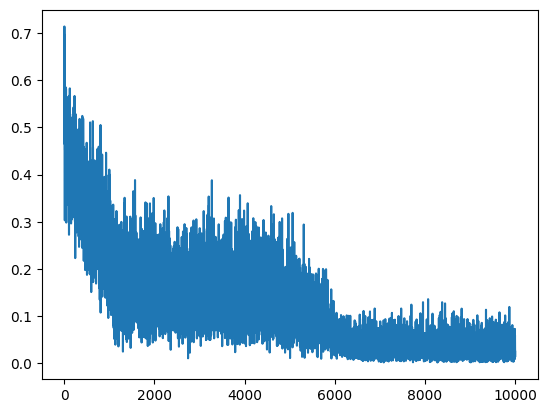

In [8]:
losses = []
for epoch in range(10000):
    optimizer.zero_grad()
    
    x = (torch.rand(32, 1) - 0.5) * 8
    
    loss = torch.mean((f(x) - g(x)) ** 2)
    loss.backward()
    optimizer.step()
    
    losses.append(float(loss))
    
plt.plot(losses)

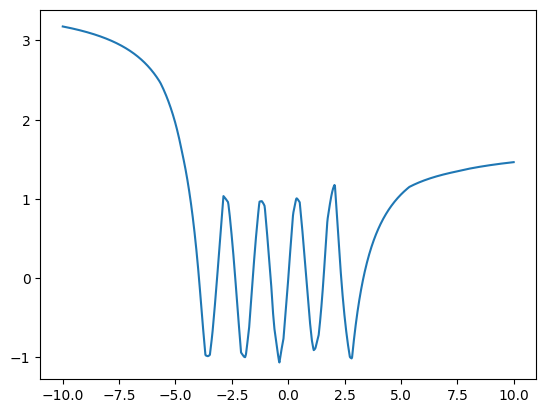

In [9]:
x = torch.linspace(-10, 10, 1000).unsqueeze(1)
plt.plot(x, f(x).detach())